Topic: Challenge 3

Subject: Pandas

Date: 1/21/18

Name: Louisa Ying

Worked with: Brian Kim, Christine Liu


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

**Challenge 1**

Plot domestic total gross over time.

In [4]:
df = pd.read_csv('2013_movies.csv')

In [5]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

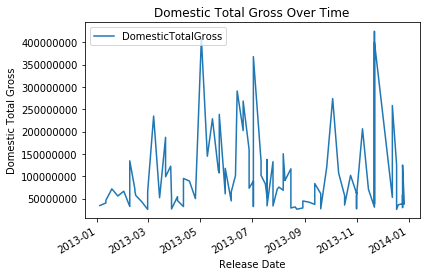

In [7]:
ax = df.set_index('ReleaseDate').plot(y = 'DomesticTotalGross', title = 'Domestic Total Gross Over Time')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set(xlabel='Release Date', ylabel='Domestic Total Gross');

**Challenge 2**

Plot runtime vs. domestic total gross.

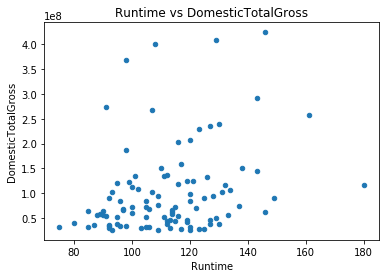

In [8]:
df.plot.scatter(x = 'Runtime', y = 'DomesticTotalGross', title = 'Runtime vs DomesticTotalGross');

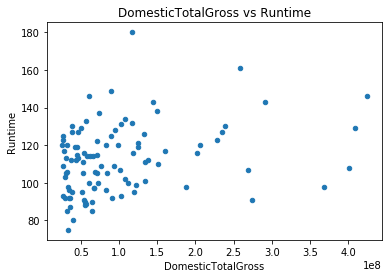

In [9]:
df.plot.scatter(x = 'DomesticTotalGross', y = 'Runtime', title = 'DomesticTotalGross vs Runtime');

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [10]:
df.groupby(df['Rating'])[['DomesticTotalGross', 'Runtime']].mean()

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

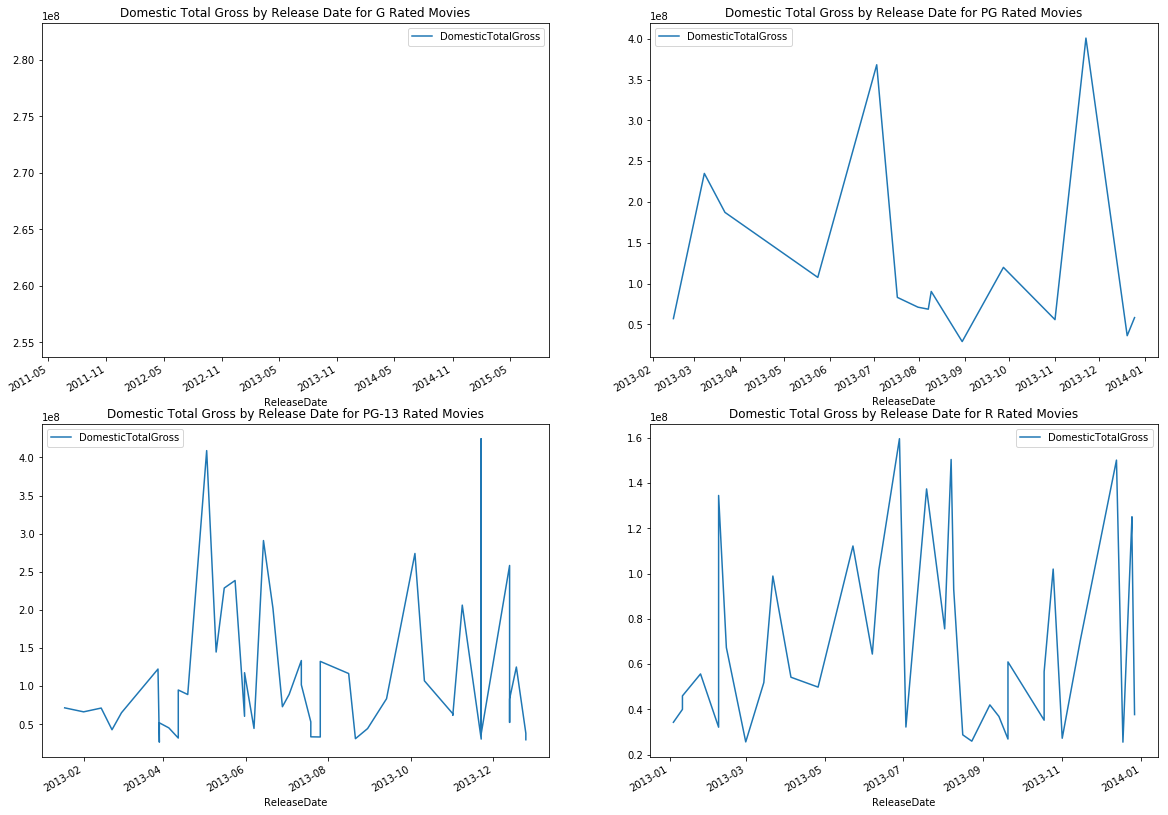

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df[df['Rating'] == 'G'].plot(x = 'ReleaseDate', y = 'DomesticTotalGross', title = 'Domestic Total Gross by Release Date for G Rated Movies', ax=axes[0,0], figsize=(20,15))
df[df['Rating'] == 'PG'].plot(x = 'ReleaseDate', y = 'DomesticTotalGross', title = 'Domestic Total Gross by Release Date for PG Rated Movies', ax=axes[0,1], figsize=(20,15))
df[df['Rating'] == 'PG-13'].plot(x = 'ReleaseDate', y = 'DomesticTotalGross', title = 'Domestic Total Gross by Release Date for PG-13 Rated Movies', ax=axes[1,0], figsize=(20,15))
df[df['Rating'] == 'R'].plot(x = 'ReleaseDate', y = 'DomesticTotalGross', title = 'Domestic Total Gross by Release Date for R Rated Movies', ax=axes[1,1], figsize=(20,15));

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [13]:
df.groupby(['Director'])[['DomesticTotalGross']].mean().sort_values('DomesticTotalGross', ascending = False).head(1)

,DomesticTotalGross
Director,
Francis Lawrence,424668047


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [14]:
df = df.set_index('ReleaseDate')

In [15]:
sd = df.groupby(pd.Grouper(freq = 'M')).DomesticTotalGross.sem()

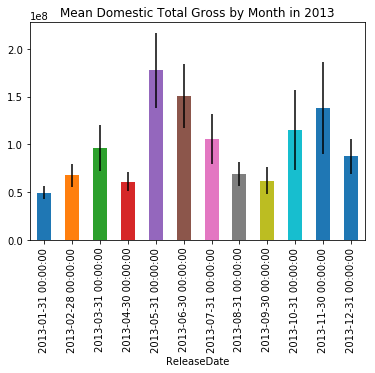

In [17]:
df.groupby(pd.Grouper(freq = 'M')).DomesticTotalGross.mean().plot(kind='bar', yerr=sd, title = 'Mean Domestic Total Gross by Month in 2013');